# Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('D:\\AI STUDY MATERIAL\\ML\\titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Analyzing Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.shape

(891, 12)

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Finding null value percentage of age,cabin and embarked. And replacing them by mean value of age and mode value of embarked.

In [7]:
(data['Age'].isnull().sum()/data.shape[0])*100

19.865319865319865

In [8]:
data['Age'].mean()

29.69911764705882

In [9]:
(data['Cabin'].isnull().sum()/data.shape[0])*100

77.10437710437711

In [10]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

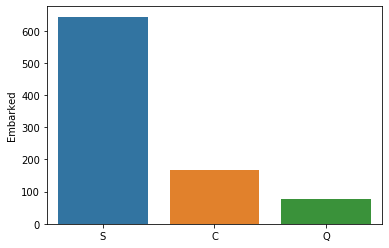

In [11]:
sns.barplot(x=data['Embarked'].value_counts().index,y=data['Embarked'].value_counts(),data=data)

In [12]:
data=data.drop('Cabin',1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [13]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [14]:
data['Embarked']=data['Embarked'].fillna('S')

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Visualizing Survived count with each feature

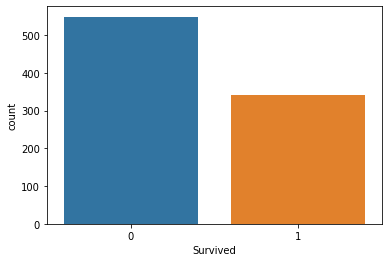

In [16]:
sns.countplot(data['Survived'])

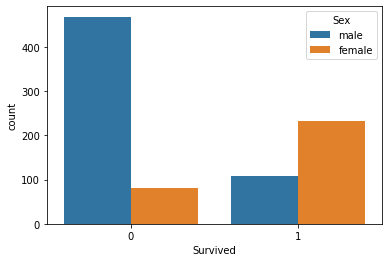

In [17]:
sns.countplot(data['Survived'],hue=data['Sex'])

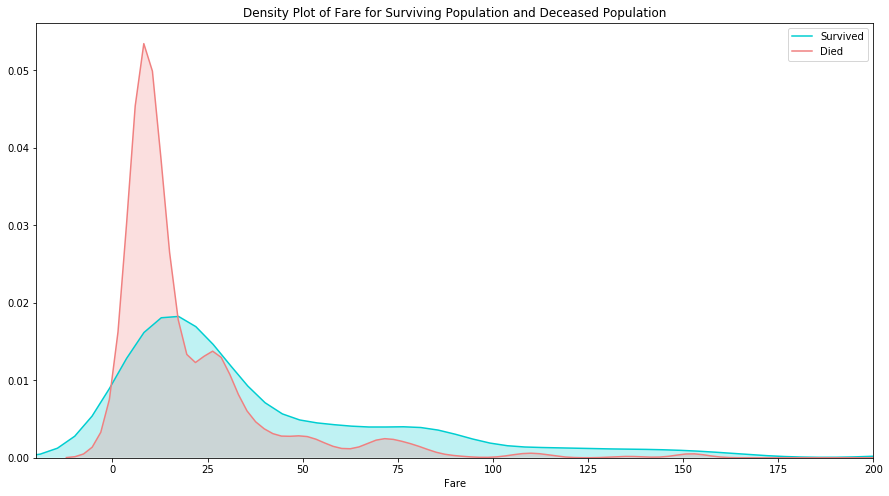

In [18]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Fare"][data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Fare"][data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class.



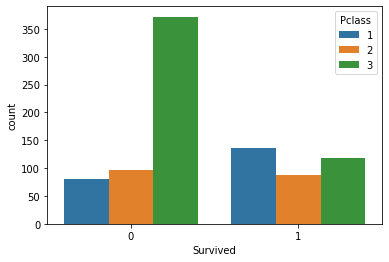

In [19]:
sns.countplot(data['Survived'],hue=data['Pclass'])

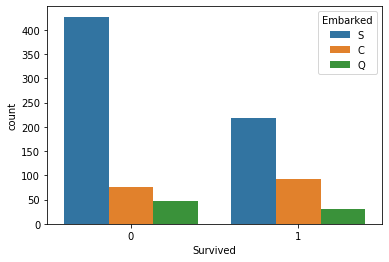

In [20]:
sns.countplot(data['Survived'],hue=data['Embarked'])

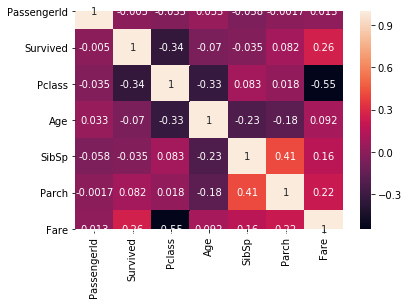

In [21]:
sns.heatmap(data.corr(),annot=True)

In [22]:
num_columns=[u'PassengerId',u'Survived',u'Pclass',u'Age',u'SibSp',u'Parch',u'Fare']

# Using boxplot to find outliers

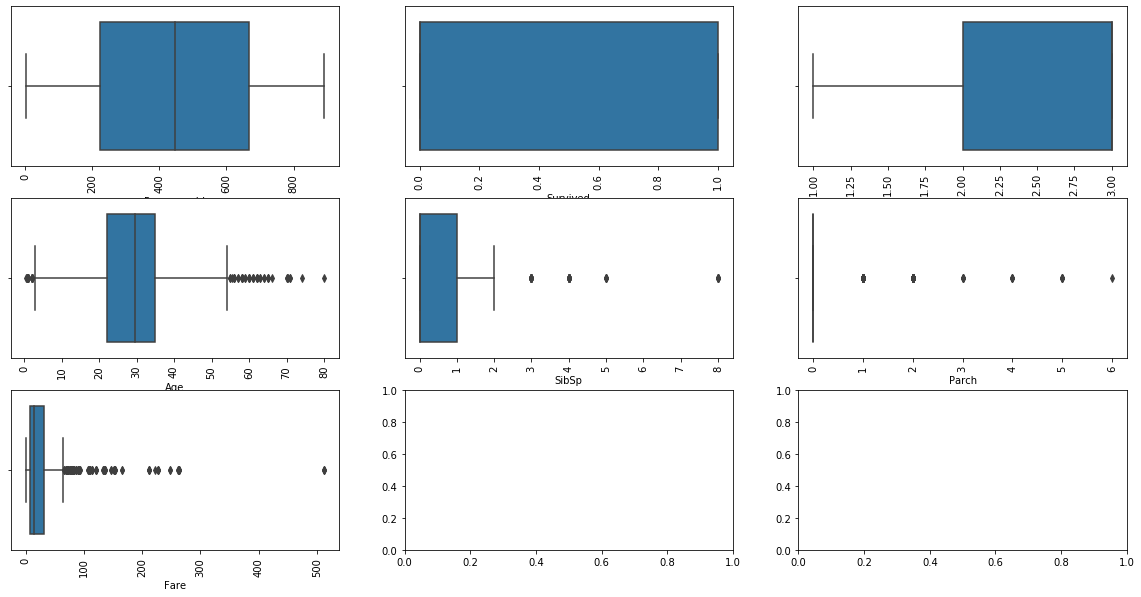

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(20, 10))
for var, subplot in zip(num_columns, ax.flatten()):
    sns.boxplot(data[var], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

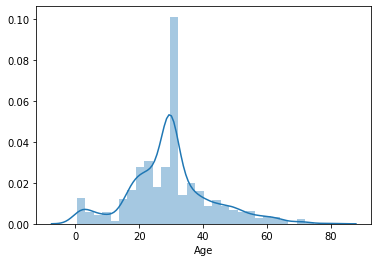

In [24]:
sns.distplot(data['Age'])

In [25]:
data['Age'].skew()

0.4344880940129925

Finding outliers for Age feature using z score and then removing them from data

In [26]:
from scipy import stats
z=np.abs(stats.zscore(data['Age']))
threshold=3
pos=np.where(z>3)
print(pos)

(array([ 96, 116, 493, 630, 672, 745, 851], dtype=int64),)


In [27]:
for i in pos:
    data=data.drop(data.index[i],axis=0)
data.reset_index(inplace=True)

In [28]:
data

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
879,886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
880,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
881,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
882,889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [29]:
data=data.drop('index',1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
879,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
880,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
881,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
882,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


Finding outliers for Fare feature using z score and then removing them from data

In [30]:
z1=np.abs(stats.zscore(data['Fare']))
threshold=3
pos1=np.where(z1>3)
print(pos1)

(array([ 27,  88, 116, 256, 297, 309, 339, 375, 378, 436, 524, 554, 674,
       684, 695, 711, 725, 732, 737, 773], dtype=int64),)


In [31]:
for i in pos1:
    data=data.drop(data.index[i],axis=0)
data.reset_index(inplace=True)

In [32]:
data

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...,...
859,879,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
860,880,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
861,881,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
862,882,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [33]:
data=data.drop('index',1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
859,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
860,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
861,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
862,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


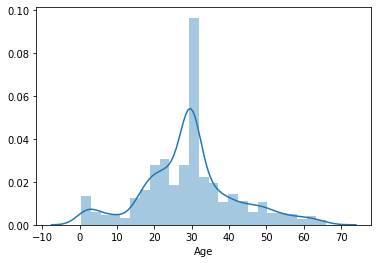

In [34]:
sns.distplot(data['Age'])

In [35]:
data['Age'].skew()

0.23900205834552368

2.2571777277456286

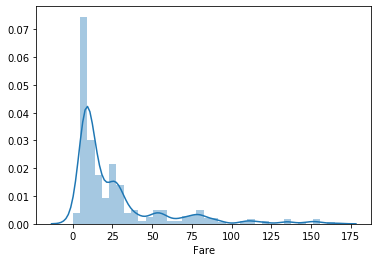

In [36]:
sns.distplot(data['Fare'])
data['Fare'].skew()

Adjusting skewness of Fare feature 

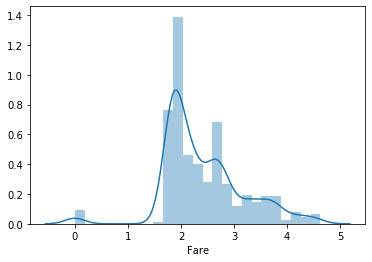

In [37]:
x=(data['Fare']**0.3)
sns.distplot(x)

In [38]:
x.skew()

0.39775787028372345

In [39]:
'''data['Fare']=data['Fare']**0.3
data.head()'''

"data['Fare']=data['Fare']**0.3\ndata.head()"

In [40]:
num_columns=[u'PassengerId',u'Survived',u'Pclass',u'Age',u'SibSp',u'Parch',u'Fare']
from scipy.stats import pearsonr

# Finding Pearson Correlation among numerical variables with Survived as target.

In [41]:
corr=[]
for i in num_columns:
    x=pearsonr(data[i],data['Survived'])
    corr.append(x)
corr

[(-0.014398579245192257, 0.6725584816223008),
 (0.9999999999999999, 0.0),
 (-0.333535053346935, 6.79086897999909e-24),
 (-0.06338621692772561, 0.06255485351527047),
 (-0.04173412528019114, 0.22039226689960278),
 (0.08006514788075315, 0.01858272379606286),
 (0.3007954033036284, 1.5826826466173643e-19)]

In [42]:
x1=np.array(corr)
pvalue1=pd.Series(x1[:,1],index=num_columns)
pvalue1

PassengerId    6.725585e-01
Survived       0.000000e+00
Pclass         6.790869e-24
Age            6.255485e-02
SibSp          2.203923e-01
Parch          1.858272e-02
Fare           1.582683e-19
dtype: float64

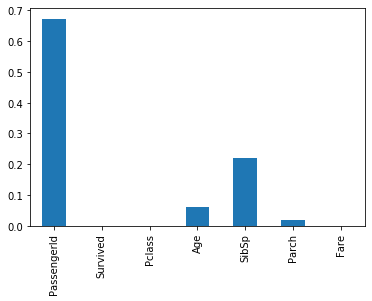

In [43]:
pvalue1.plot.bar()

From the plot we can see Passengerid has large pvalue, so we can ignore this feature. But for the other we have to transform them into other feature.

In [44]:
data=data.drop('PassengerId',1)

In [45]:
cat_data=data.select_dtypes(include='object')
cat_data.head(2)

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C


In [46]:
cat_data=cat_data.drop(['Name',"Ticket"],1)
cat_data.head()

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S


In [47]:
sex=pd.get_dummies(cat_data['Sex'],prefix='Sex')
sex

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
859,0,1
860,1,0
861,1,0
862,0,1


In [48]:
embark=pd.get_dummies(cat_data['Embarked'],prefix='Embark')
embark

,Embark_C,Embark_Q,Embark_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
859,0,0,1
860,0,0,1
861,0,0,1
862,1,0,0


In [49]:
cat_data=pd.concat([sex,embark],axis=1)
cat_data.head()

,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [50]:
num_data=data.select_dtypes(exclude='object')
num_data.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


In [51]:
num_data['Pclass'].value_counts()

3    489
1    192
2    183
Name: Pclass, dtype: int64

In [52]:
Pclass=pd.get_dummies(num_data['Pclass'],prefix='Pclass')
Pclass.head(3)

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1


In [53]:
num_data['travel_alone']=np.where((num_data['SibSp']+num_data['Parch'])>0,1,0)
num_data=num_data.drop(['SibSp','Parch'],1)

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [54]:
num_data=pd.concat([num_data,Pclass],axis=1)
num_data=num_data.drop('Pclass',1)

In [55]:
num_data.head(3)

,Survived,Age,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,0,1
1,1,38.0,71.2833,1,1,0,0
2,1,26.0,7.9250,0,0,0,1


In [56]:
num_data['Age'].value_counts()

29.699118    175
24.000000     28
22.000000     27
28.000000     25
30.000000     25
            ... 
12.000000      1
34.500000      1
0.920000       1
0.670000       1
0.420000       1
Name: Age, Length: 84, dtype: int64

In [57]:
bins=[0,18,40,100]
labels=['Kid','Adult','Old']
num_data['Age']=pd.cut(num_data['Age'],bins=bins,labels=labels,right=False)
num_data.head()

,Survived,Age,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3
0,0,Adult,7.2500,1,0,0,1
1,1,Adult,71.2833,1,1,0,0
2,1,Adult,7.9250,0,0,0,1
3,1,Adult,53.1000,1,1,0,0
4,0,Adult,8.0500,0,0,0,1


In [58]:
age=pd.get_dummies(num_data['Age'],prefix='Age')


In [59]:
num_data=pd.concat([num_data,age],1)
num_data=num_data.drop('Age',1)
num_data.head(3)

,Survived,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3,Age_Kid,Age_Adult,Age_Old
0,0,7.2500,1,0,0,1,0,1,0
1,1,71.2833,1,1,0,0,0,1,0
2,1,7.9250,0,0,0,1,0,1,0


In [60]:
num_data.shape

(864, 9)

In [61]:
cat_data.head(3)

,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1


In [62]:
cat_data.shape

(864, 5)

In [63]:
new_data=pd.concat([num_data,cat_data],1)
new_data.head()

,Survived,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3,Age_Kid,Age_Adult,Age_Old,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
0,0,7.2500,1,0,0,1,0,1,0,0,1,0,0,1
1,1,71.2833,1,1,0,0,0,1,0,1,0,1,0,0
2,1,7.9250,0,0,0,1,0,1,0,1,0,0,0,1
3,1,53.1000,1,1,0,0,0,1,0,1,0,0,0,1
4,0,8.0500,0,0,0,1,0,1,0,0,1,0,0,1


In [64]:
new_data.corr()

,Survived,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3,Age_Kid,Age_Adult,Age_Old,Sex_female,Sex_male,Embark_C,Embark_Q,Embark_S
Survived,1.000000,0.300795,0.201838,0.277437,0.103609,-0.318131,0.125119,-0.088501,-0.003308,0.534012,-0.534012,0.160345,0.010415,-0.145521
Fare,0.300795,1.000000,0.383764,0.693355,-0.102025,-0.497488,0.040872,-0.168717,0.168058,0.234302,-0.234302,0.229379,-0.139006,-0.109542
travel_alone,0.201838,0.383764,1.000000,0.099410,0.046307,-0.121561,0.316875,-0.242301,0.013597,0.303869,-0.303869,0.095321,-0.082870,-0.029433
Pclass_1,0.277437,0.693355,0.099410,1.000000,-0.277088,-0.610386,-0.115114,-0.153106,0.286780,0.086930,-0.086930,0.267531,-0.146343,-0.137878
Pclass_2,0.103609,-0.102025,0.046307,-0.277088,1.000000,-0.591958,-0.006091,-0.018961,0.028312,0.071496,-0.071496,-0.115598,-0.130986,0.184043
Pclass_3,-0.318131,-0.497488,-0.121561,-0.610386,-0.591958,1.000000,0.101580,0.144059,-0.263895,-0.131858,0.131858,-0.129111,0.230737,-0.036068
Age_Kid,0.125119,0.040872,0.316875,-0.115114,-0.006091,0.101580,1.000000,-0.581800,-0.178313,0.107326,-0.107326,0.036347,-0.034694,-0.009240
Age_Adult,-0.088501,-0.168717,-0.242301,-0.153106,-0.018961,0.144059,-0.581800,1.000000,-0.696555,-0.067039,0.067039,-0.052157,0.099551,-0.018634
Age_Old,-0.003308,0.168058,0.013597,0.286780,0.028312,-0.263895,-0.178313,-0.696555,1.000000,-0.013576,0.013576,0.031035,-0.089831,0.030695
Sex_female,0.534012,0.234302,0.303869,0.086930,0.071496,-0.131858,0.107326,-0.067039,-0.013576,1.000000,-1.000000,0.077195,0.080858,-0.118664


In [65]:
X=new_data.drop(['Survived','Sex_male'],1)
y=new_data['Survived']

In [66]:
X.head(3)

,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3,Age_Kid,Age_Adult,Age_Old,Sex_female,Embark_C,Embark_Q,Embark_S
0,7.2500,1,0,0,1,0,1,0,0,0,0,1
1,71.2833,1,1,0,0,0,1,0,1,1,0,0
2,7.9250,0,0,0,1,0,1,0,1,0,0,1


In [67]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [69]:
X_train.head()

,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3,Age_Kid,Age_Adult,Age_Old,Sex_female,Embark_C,Embark_Q,Embark_S
651,7.7750,0,0,0,1,0,1,0,0,0,0,1
352,27.7208,1,0,1,0,0,1,0,0,1,0,0
606,52.5542,1,1,0,0,0,0,1,0,0,0,1
7,21.0750,1,0,0,1,1,0,0,0,0,0,1
445,51.8625,1,1,0,0,0,1,0,1,0,0,1


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [0]] = sc.fit_transform(X_train.iloc[:, [0]])
X_test.iloc[:, [0]] = sc.transform(X_test.iloc[:, [0]])

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [71]:
X_train.head()

,Fare,travel_alone,Pclass_1,Pclass_2,Pclass_3,Age_Kid,Age_Adult,Age_Old,Sex_female,Embark_C,Embark_Q,Embark_S
651,-0.648321,0,0,0,1,0,1,0,0,0,0,1
352,0.045781,1,0,1,0,0,1,0,0,1,0,0
606,0.909968,1,1,0,0,0,0,1,0,0,0,1
7,-0.185489,1,0,0,1,1,0,0,0,0,0,1
445,0.885897,1,1,0,0,0,1,0,1,0,0,1


In [72]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(penalty='l1',)
classifier.fit(X_train, y_train)

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
classifier.score(X_test,y_test)

0.7572254335260116

In [74]:
classifier.score(X_train,y_train)

0.808972503617945

In [75]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [76]:
rfecv = RFECV(estimator=classifier, step=1, cv=StratifiedKFold(2), scoring='accuracy')
rfecv.fit(X_train, y_train)

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

RFECV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
      estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                   fit_intercept=True, intercept_scaling=1,
                                   l1_ratio=None, max_iter=100,
                                   multi_class='warn', n_jobs=None,
                                   penalty='l2', random_state=None,
                                   solver='warn', tol=0.0001, verbose=0,
                                   warm_start=False),
      min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
      verbose=0)

In [77]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 7


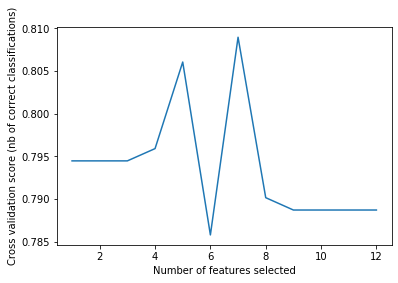

In [78]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [79]:
from sklearn.feature_selection import RFE

rfe = RFE(classifier, rfecv.n_features_)
rfe = rfe.fit(X_train, y_train)
print(list(X.columns[rfe.support_]))



['Pclass_1', 'Pclass_3', 'Age_Kid', 'Age_Adult', 'Age_Old', 'Sex_female', 'Embark_S']


C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [84]:
x=X.drop(['Fare','travel_alone','Pclass_2','Embark_C','Embark_Q'],1)
x.head()

,Pclass_1,Pclass_3,Age_Kid,Age_Adult,Age_Old,Sex_female,Embark_S
0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0
2,0,1,0,1,0,1,1
3,1,0,0,1,0,1,1
4,0,1,0,1,0,0,1


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=42)

In [86]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [87]:
y_pred=model.predict(X_test)

In [88]:
model.score(X_test,y_test)

0.7514450867052023

In [89]:
model.score(X_train,y_train)

0.8031837916063675

In [90]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
model_accuracy = accuracies.mean()
model_standard_deviation = accuracies.std()

C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ChinmoyRaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

In [91]:
model_accuracy,model_standard_deviation

(0.7973882596516868, 0.047419394864011116)

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,79,21,100
1,22,51,73
All,101,72,173


In [93]:
confusion_matrix

array([[79, 21],
       [22, 51]], dtype=int64)

In [94]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       100
           1       0.71      0.70      0.70        73

    accuracy                           0.75       173
   macro avg       0.75      0.74      0.74       173
weighted avg       0.75      0.75      0.75       173



In [95]:
list(X.columns[rfe.support_])

['Pclass_1',
 'Pclass_3',
 'Age_Kid',
 'Age_Adult',
 'Age_Old',
 'Sex_female',
 'Embark_S']

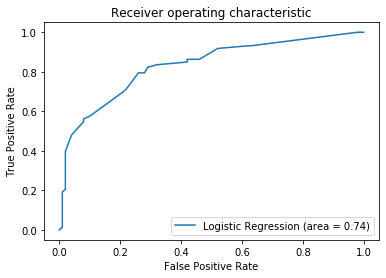

In [96]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()